# Binary Classification with a Software Defects Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load csv file 
train = pd.read_csv('../datasets/Playground_series/playground-series-s3e23/train.csv', index_col=False)
test = pd.read_csv('../datasets/Playground_series/playground-series-s3e23/test.csv', index_col=False)

In [3]:
train = train.drop('id',axis=1)
#test = test.drop('id', axis=1)
train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


  1. loc             : numeric % McCabe's line count of code
  2. v(g)            : numeric % McCabe "cyclomatic complexity"
  3. ev(g)           : numeric % McCabe "essential complexity"
  4. iv(g)           : numeric % McCabe "design complexity"
  5. n               : numeric % Halstead total operators + operands
  6. v               : numeric % Halstead "volume"
  7. l               : numeric % Halstead "program length"
  8. d               : numeric % Halstead "difficulty"
  9. i               : numeric % Halstead "intelligence"
 10. e               : numeric % Halstead "effort"
 11. b               : numeric % Halstead 
 12. t               : numeric % Halstead's time estimator
 13. lOCode          : numeric % Halstead's line count
 14. lOComment       : numeric % Halstead's count of lines of comments
 15. lOBlank         : numeric % Halstead's count of blank lines
 16. lOCodeAndComment: numeric
 17. uniq_Op         : numeric % unique operators
 18. uniq_Opnd       : numeric % unique operands
 19. total_Op        : numeric % total operators
 20. total_Opnd      : numeric % total operands
 21: branchCount     : numeric % of the flow graph
 22. defects         : {false,true} % module has/has not one or more  reported defects


In [4]:
train.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

# Defects (label)

<AxesSubplot:xlabel='defects', ylabel='count'>

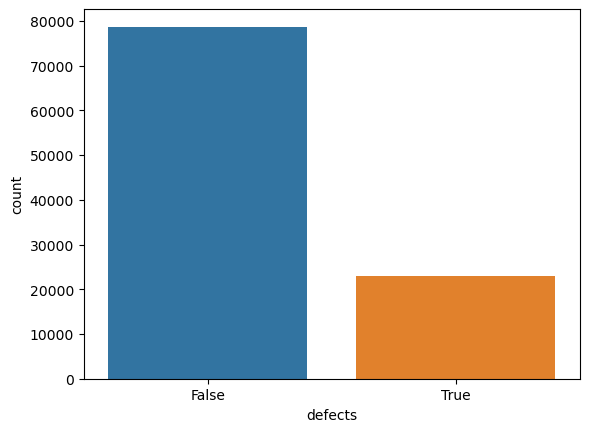

In [6]:
sns.countplot(x=train['defects'])

## LOC (Linecounts of code)

/home/roscopikotrain/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loc', ylabel='Density'>

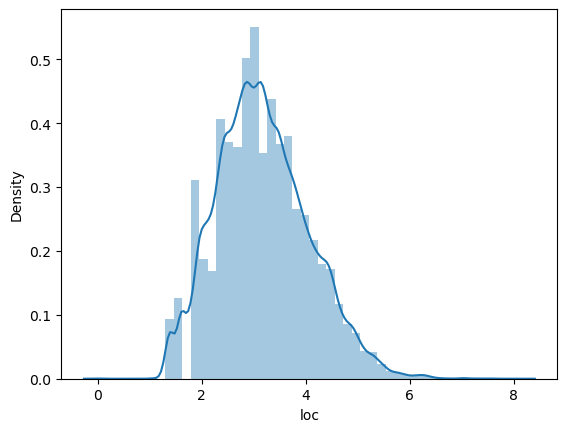

In [7]:
sns.distplot(np.log(train['loc']))

In [8]:
print(np.where((train['loc']>400)))

(array([   209,    266,    319,    468,    645,    911,   1004,   1095,
         1389,   2296,   2897,   3247,   3521,   3931,   3973,   4018,
         4184,   4716,   4763,   4945,   5459,   5787,   5843,   6681,
         7303,   7433,   8618,   8823,   9706,  10337,  10489,  10929,
        11031,  11046,  12136,  13449,  13640,  13908,  13988,  14457,
        14734,  14962,  15348,  15734,  15808,  15821,  17107,  17124,
        17426,  18193,  18288,  18855,  18933,  19046,  19148,  19365,
        19654,  19764,  20015,  20132,  20504,  20523,  20792,  20878,
        20913,  21940,  21972,  22244,  22592,  22738,  23115,  23636,
        23687,  23905,  24065,  24329,  24706,  24776,  25210,  25309,
        25338,  26024,  26381,  26398,  26436,  27675,  27731,  27772,
        27838,  28079,  28345,  28508,  29566,  29612,  31088,  31131,
        31226,  31417,  31449,  31652,  32146,  32841,  33014,  33498,
        33656,  33813,  33990,  34347,  34641,  34832,  35271,  35824,
     

## V(g) cyclomatic complexity

<AxesSubplot:xlabel='v(g)', ylabel='Count'>

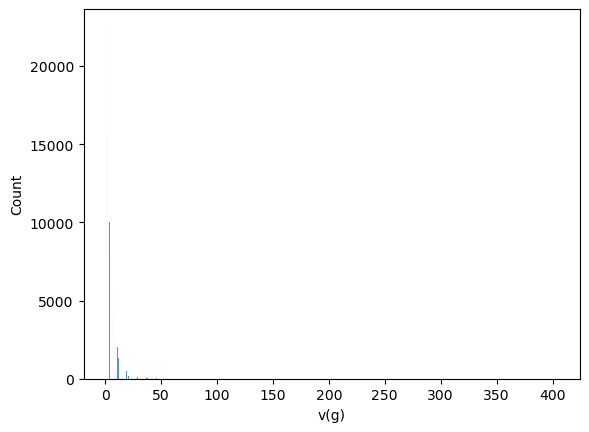

In [9]:
sns.histplot(data=train, x="v(g)")

<AxesSubplot:xlabel='v(g)'>

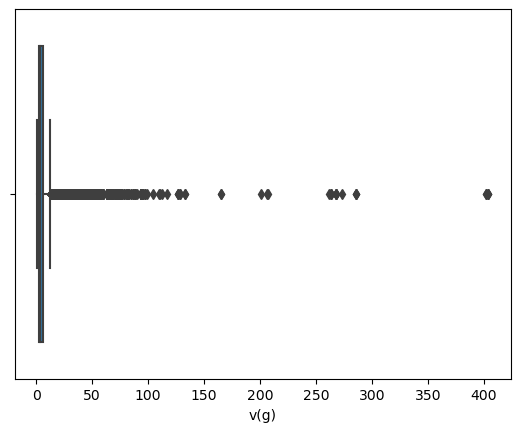

In [10]:
sns.boxplot(x=train['v(g)'])

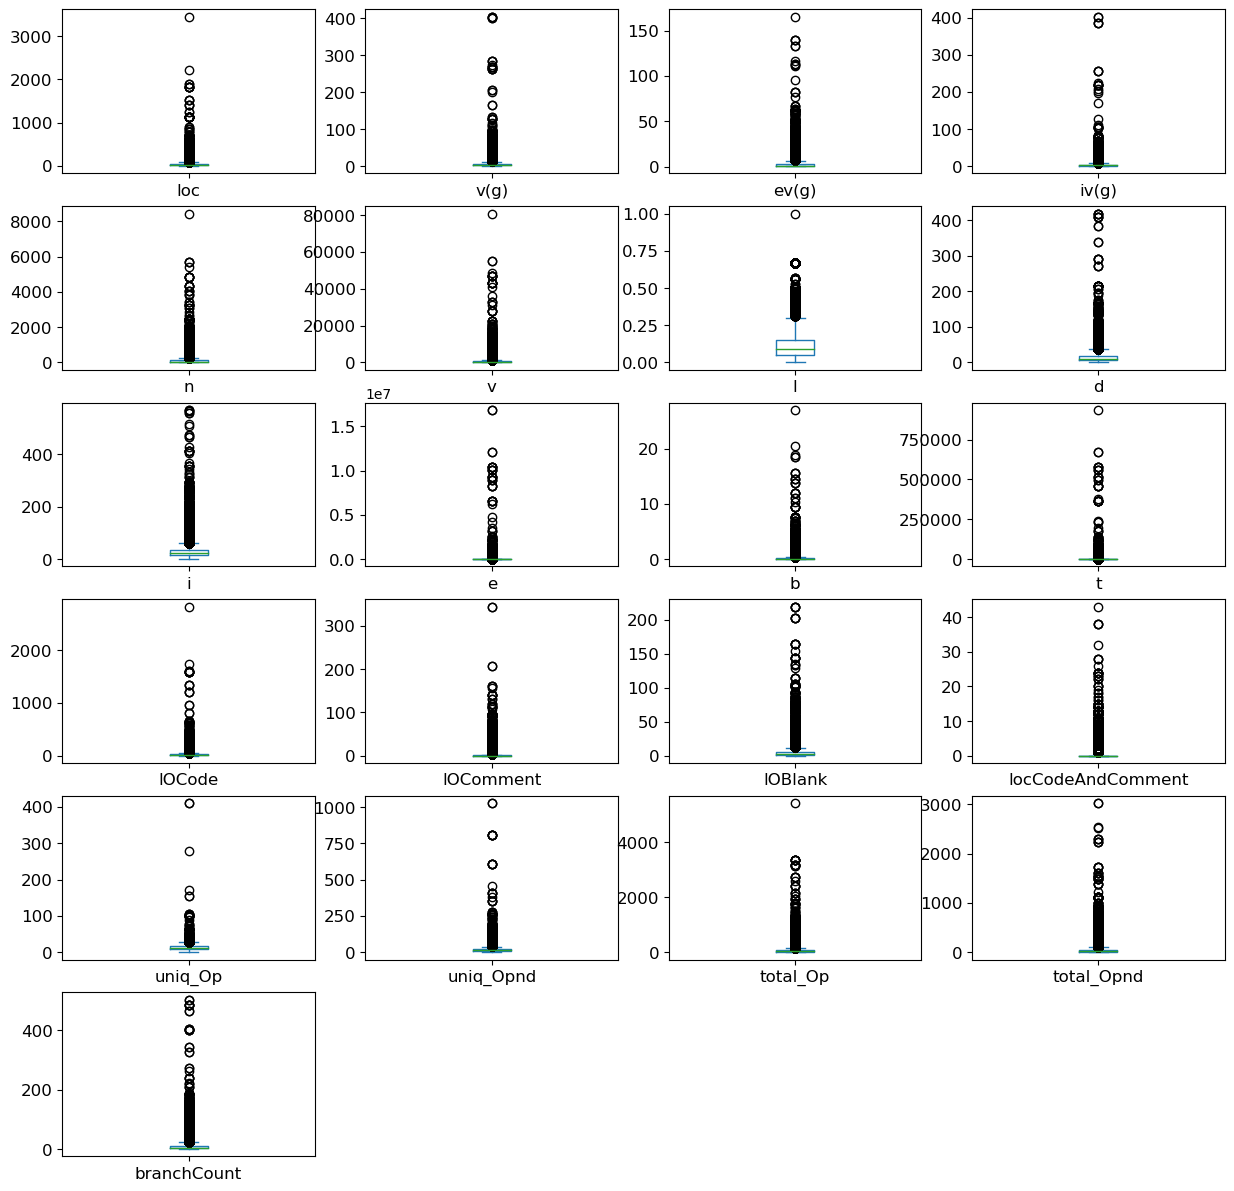

In [11]:
# Use box plot to check the value range and outliers of each feature
train_mean = train.iloc[:, :]
train_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, fontsize=12, figsize=(15,20));

In [12]:
train.corr()['defects']

loc                  0.342642
v(g)                 0.301187
ev(g)                0.259928
iv(g)                0.245618
n                    0.258080
v                    0.231179
l                   -0.253237
d                    0.241936
i                    0.208577
e                    0.095366
b                    0.232594
t                    0.099592
lOCode               0.250604
lOComment            0.205402
lOBlank              0.257819
locCodeAndComment    0.133150
uniq_Op              0.178474
uniq_Opnd            0.246113
total_Op             0.250533
total_Opnd           0.252752
branchCount          0.322827
defects              1.000000
Name: defects, dtype: float64

<AxesSubplot:xlabel='loc', ylabel='v(g)'>

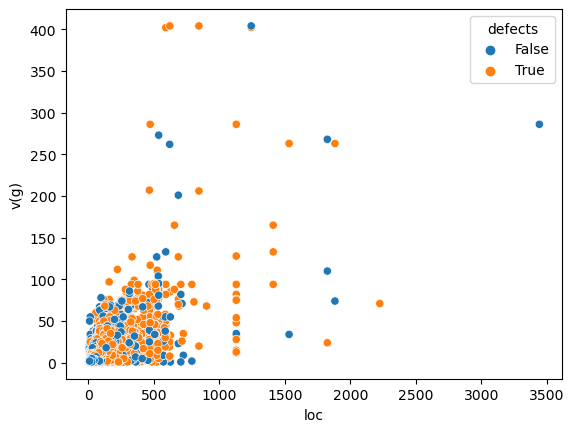

In [13]:
sns.scatterplot(data=train, x="loc", y="v(g)", hue="defects")

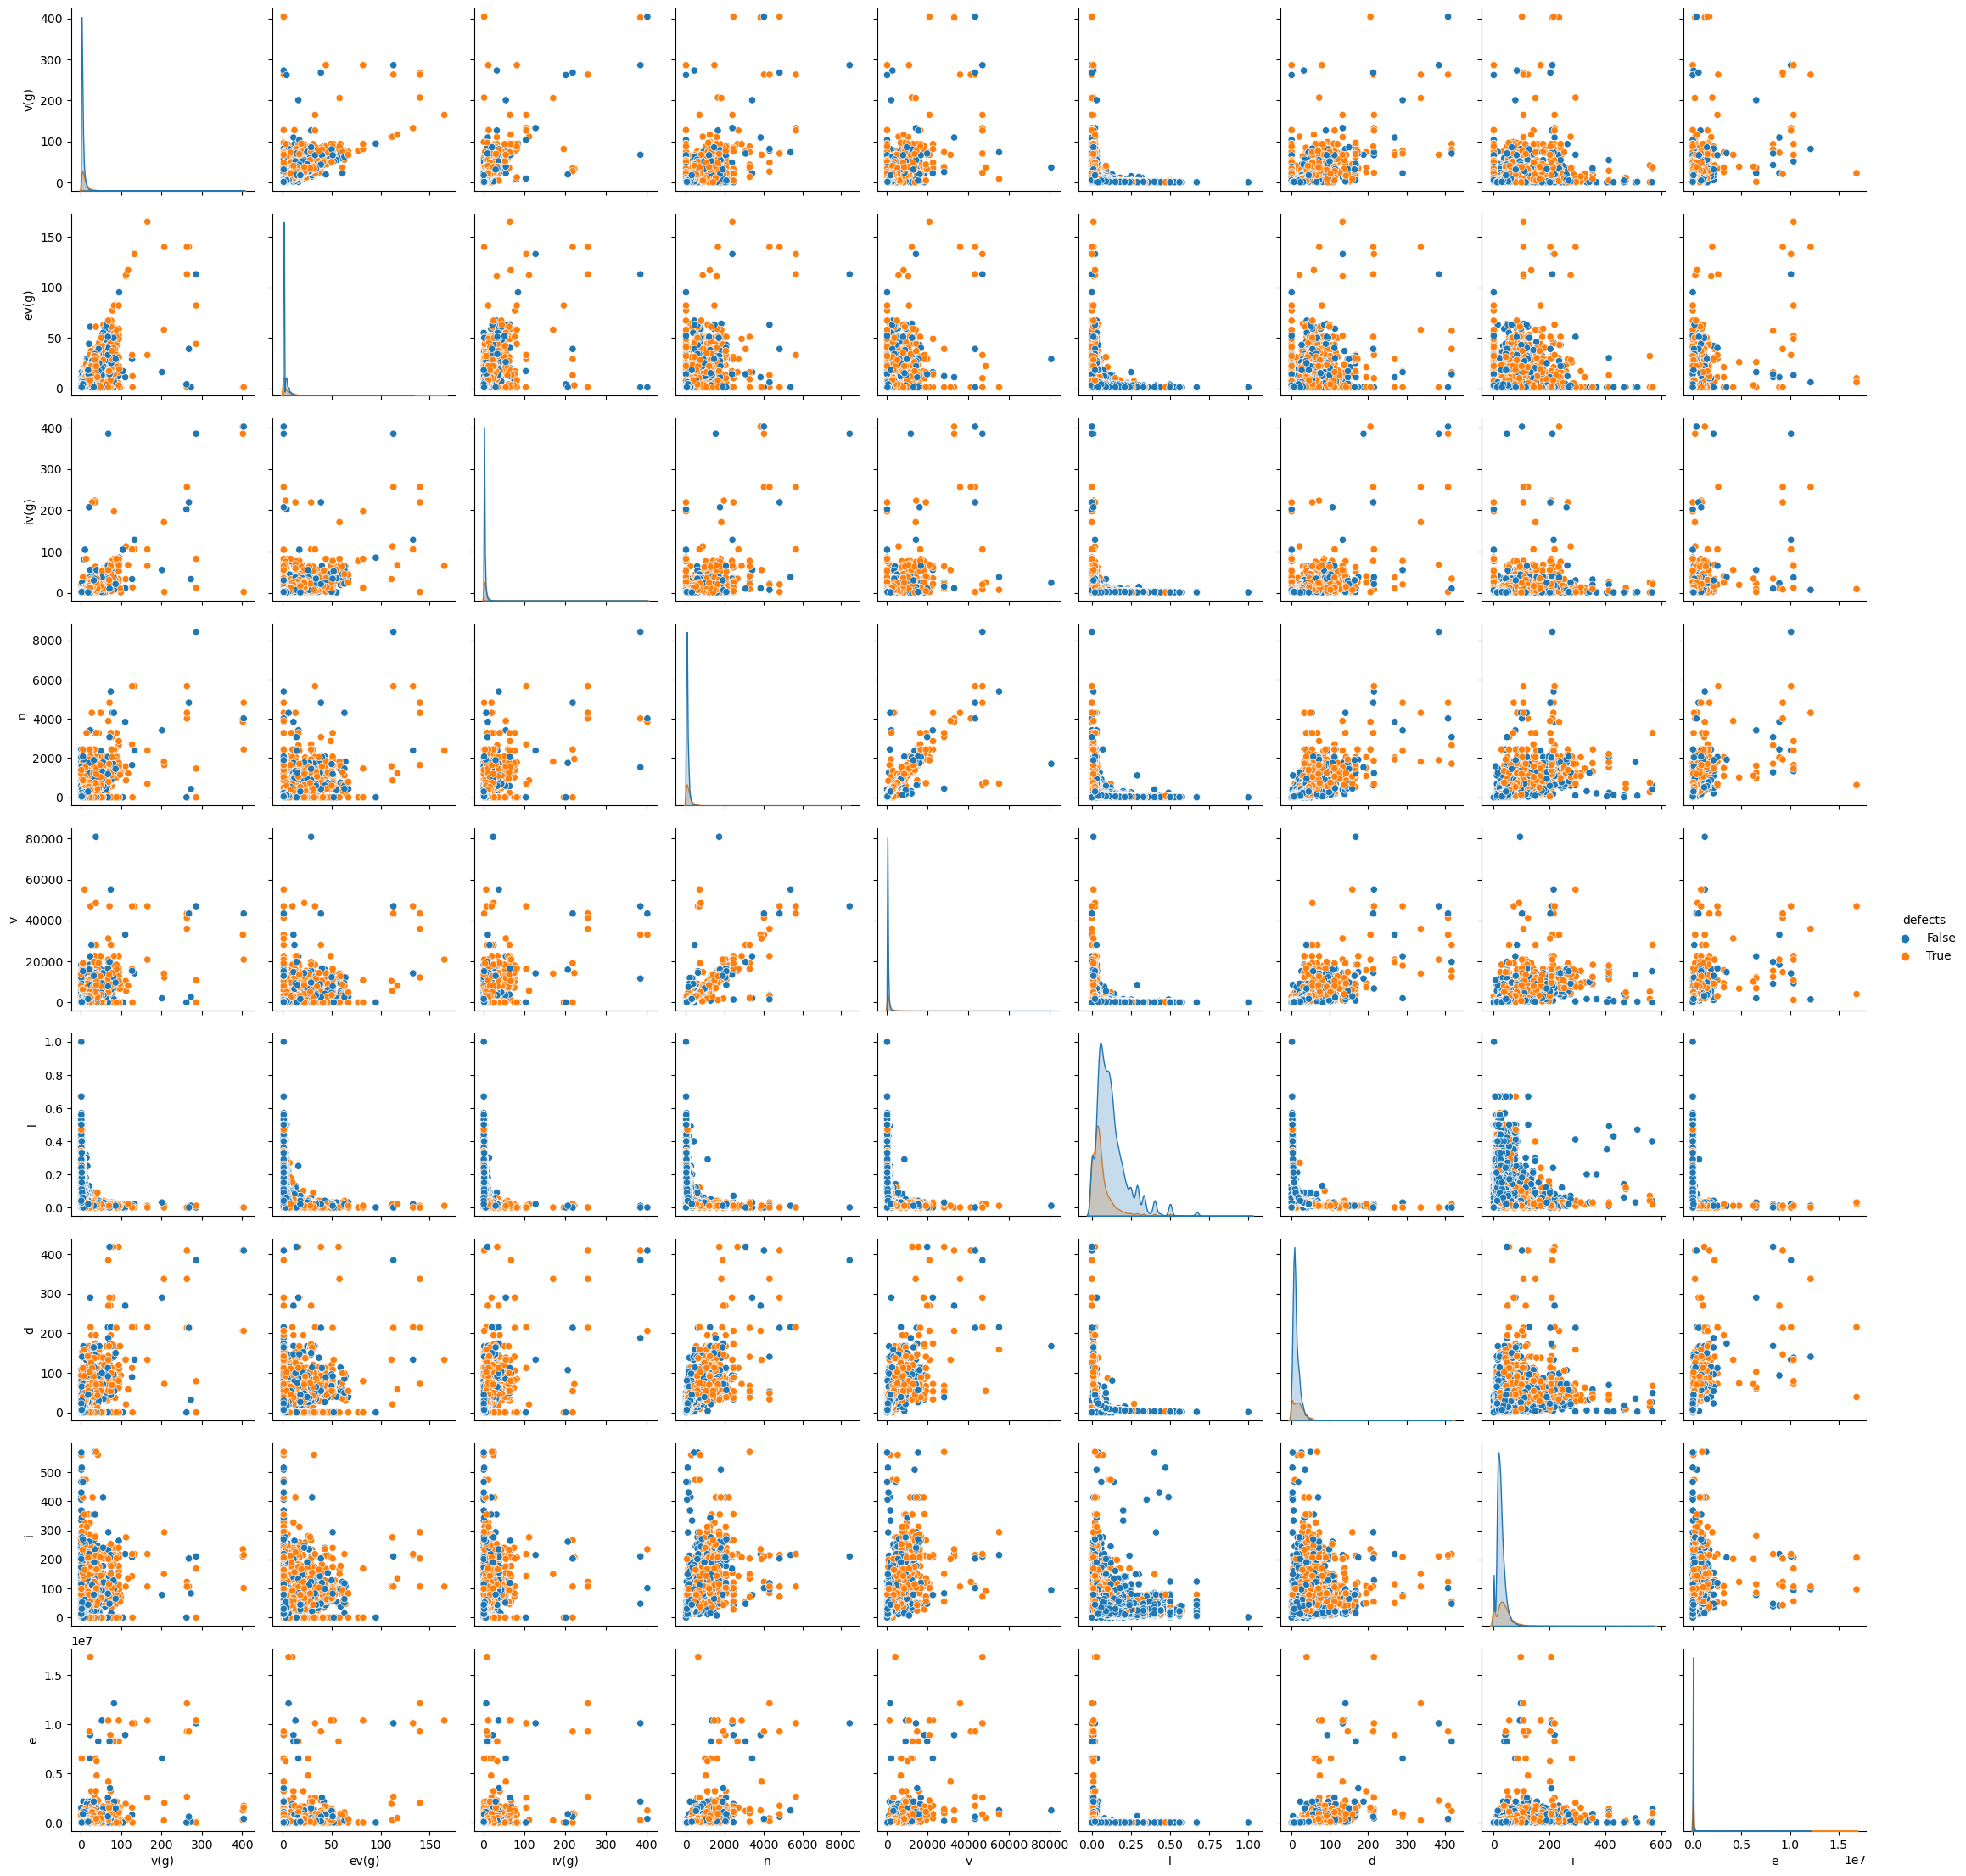

In [14]:
# Scatter plots of the first 10 "mean" features
#sns.pairplot(train[train[1:5].tolist()],hue="defects")
sns.pairplot(train[list(train.columns[1:10]) + ['defects']], hue = "defects");

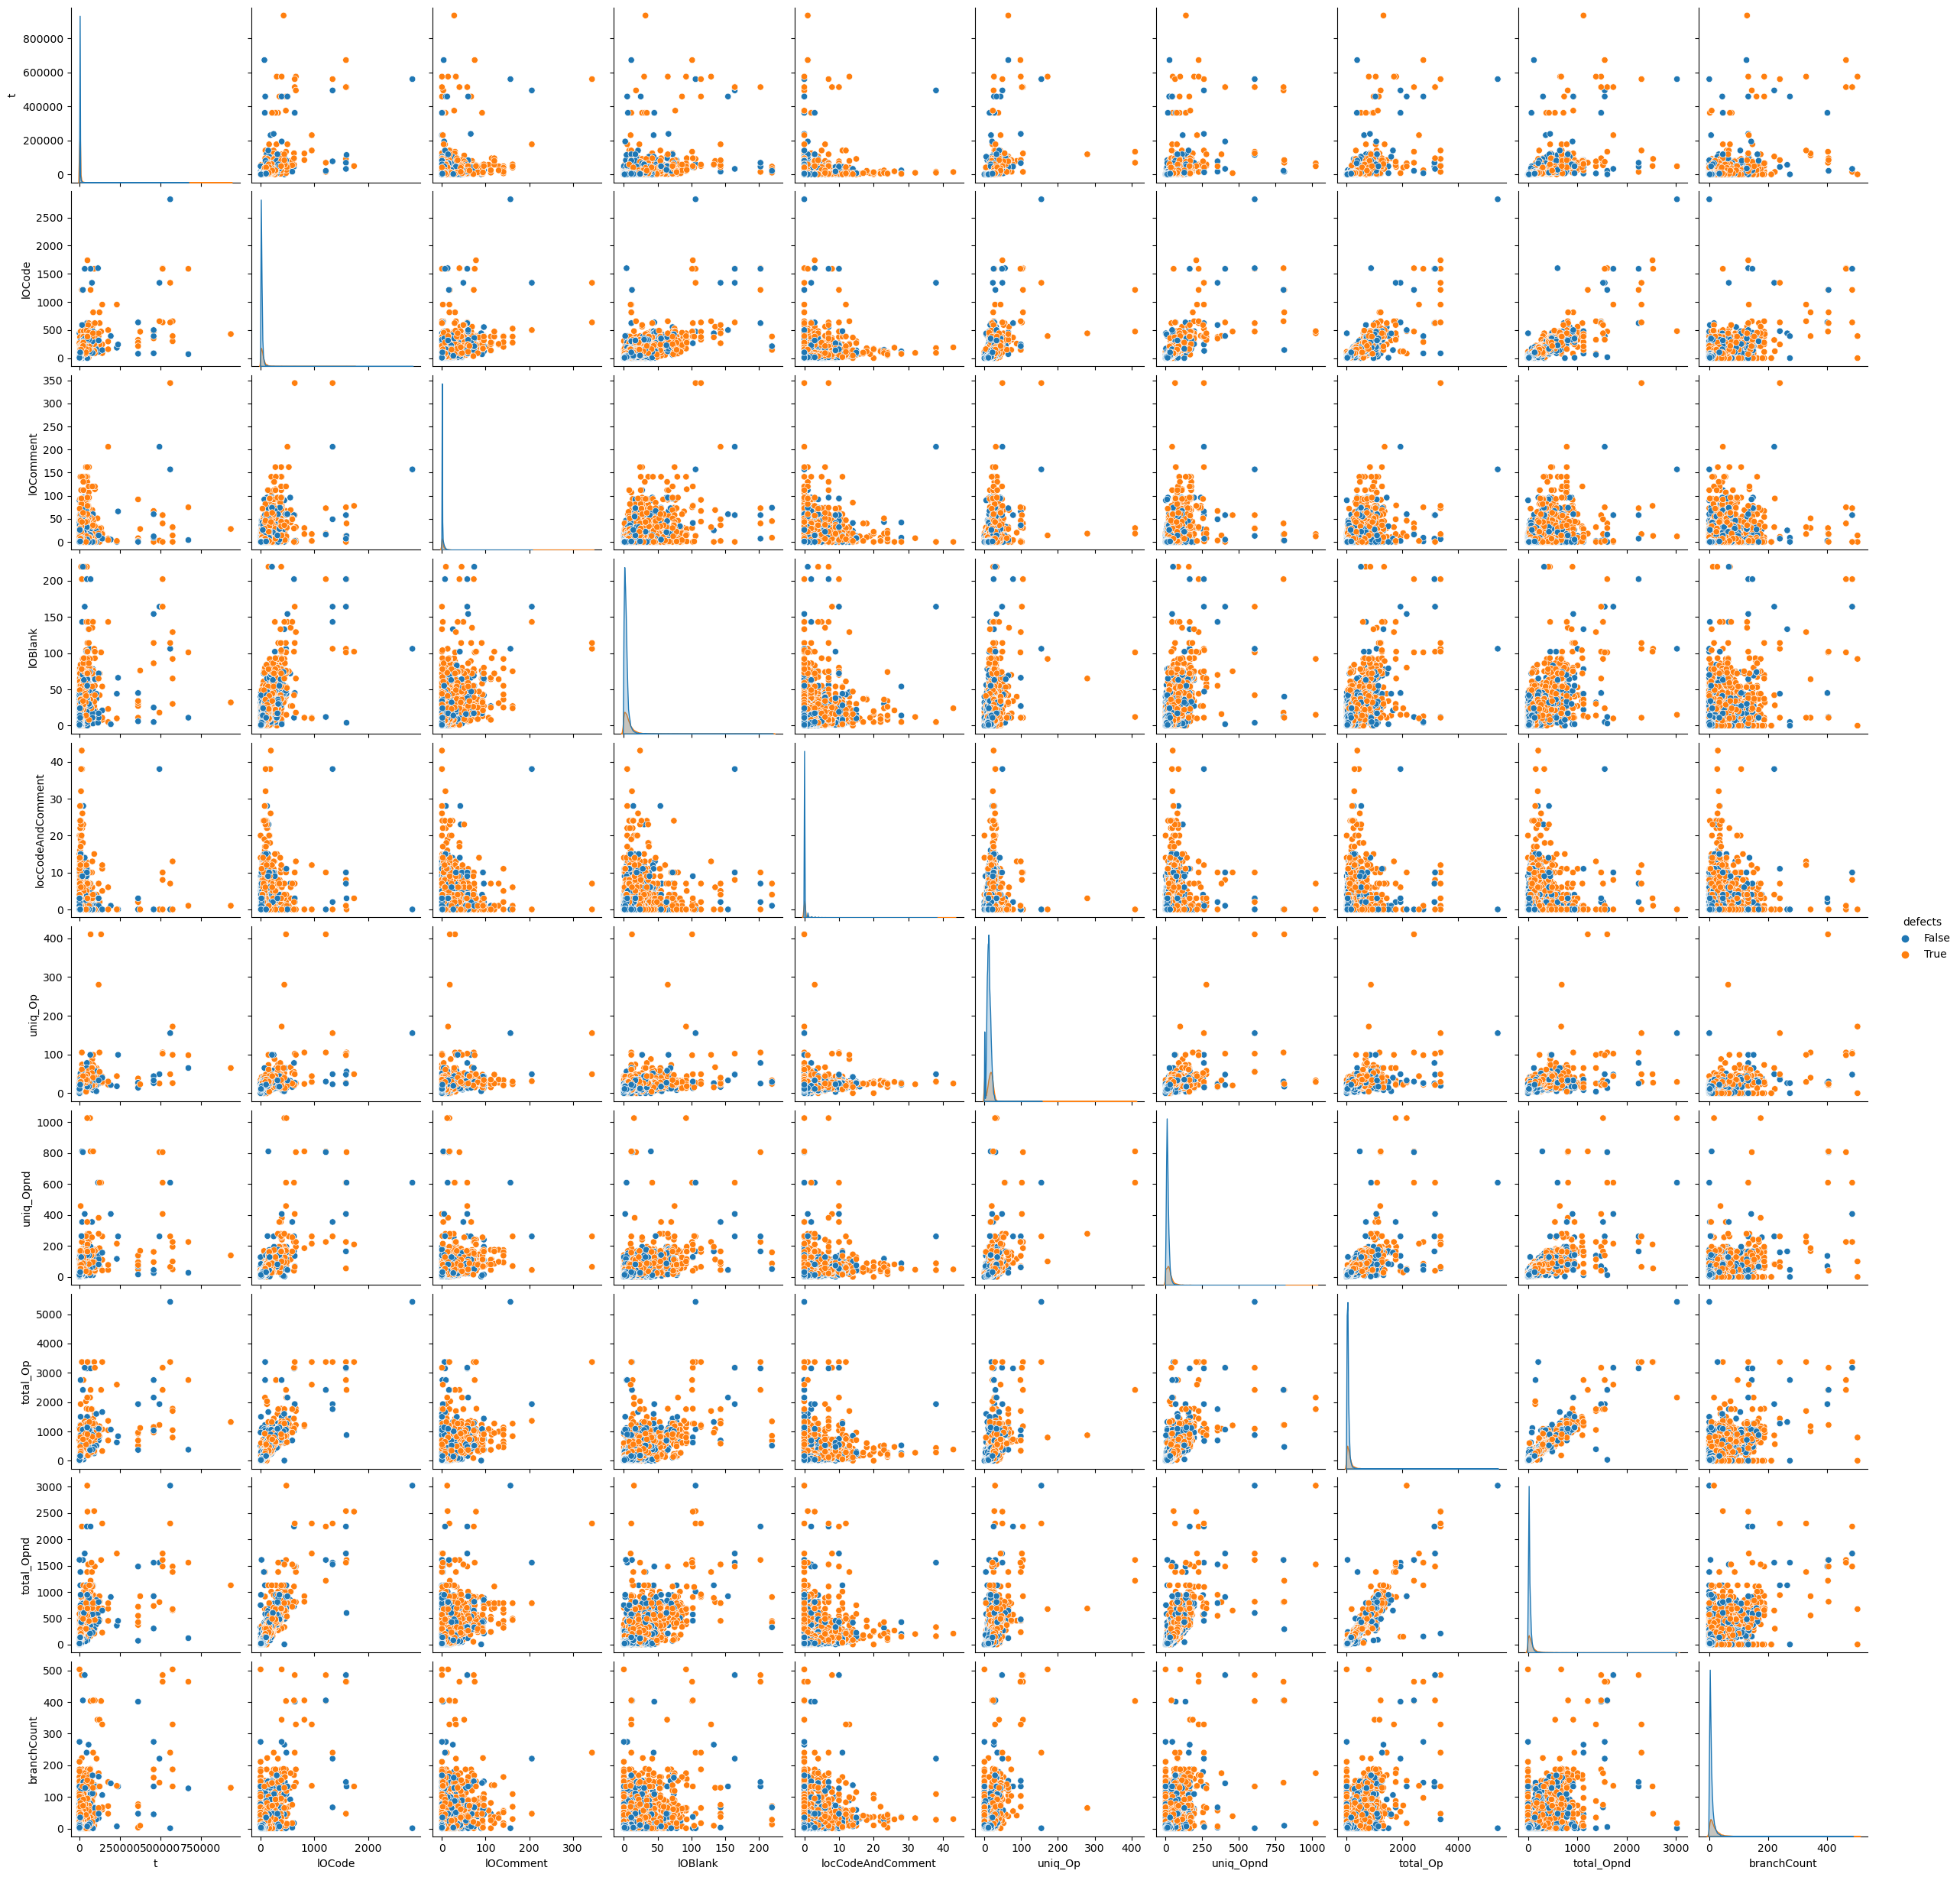

In [16]:
sns.pairplot(train[list(train.columns[11:21]) + ['defects']], hue = "defects");

In [17]:
Y = train['defects']
X = train.drop('defects',axis=1)

<AxesSubplot:>

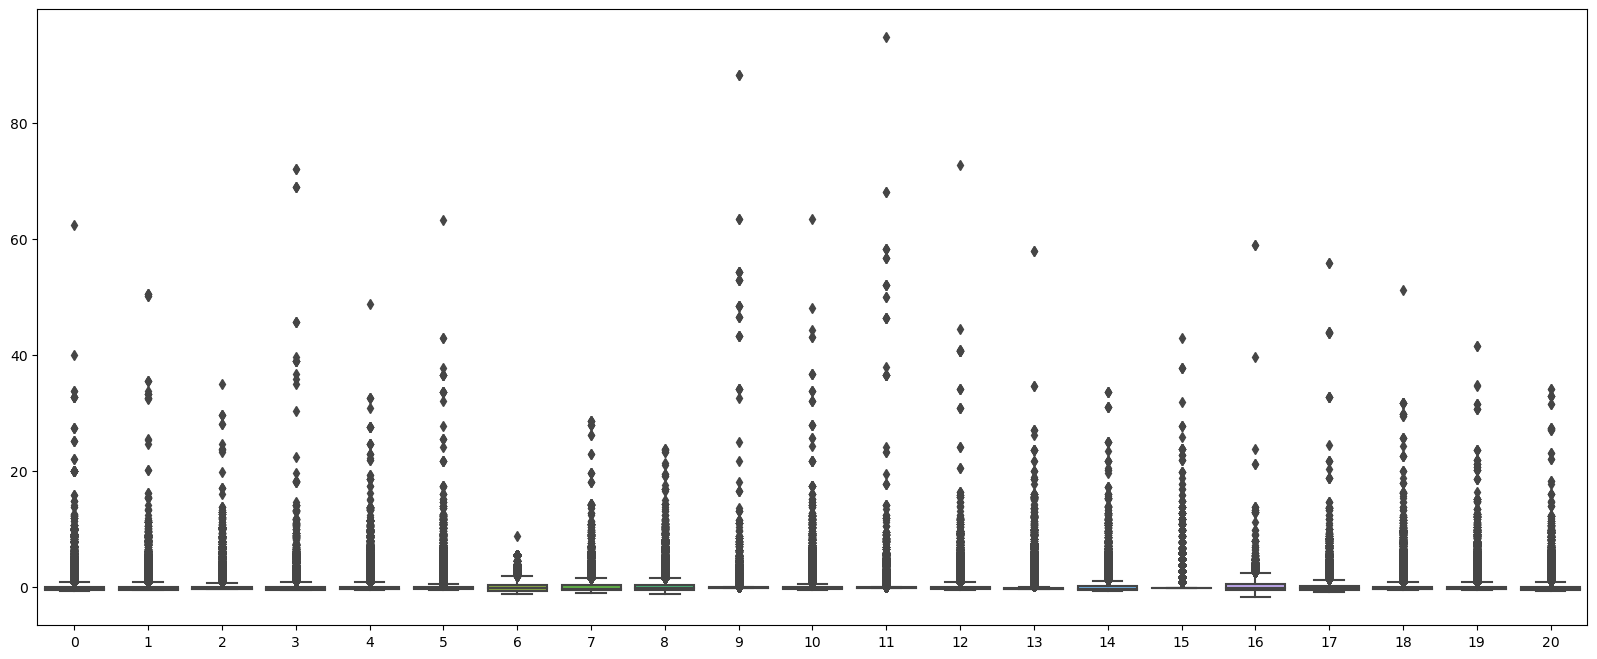

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs, ax=ax)